<a href="https://colab.research.google.com/github/vishalpanchamia/Reasoning-LLMs-from-Scratch/blob/main/10_1_Cliff_Walking_Problem_using_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Step 1: Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random


* Step 2: Define the Gridworld Environment


In [ ]:
class CliffWalkingEnv:
    def __init__(self, rows=4, cols=12):
        self.rows = rows
        self.cols = cols
        self.start = (3, 0)
        self.goal = (3, 11)
        self.reset()

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        r, c = self.state
        if action == 0: r = max(r - 1, 0)       # up
        if action == 1: r = min(r + 1, self.rows - 1)  # down
        if action == 2: c = max(c - 1, 0)       # left
        if action == 3: c = min(c + 1, self.cols - 1)  # right
        next_state = (r, c)

        if r == 3 and 1 <= c <= 10:  # fell off the cliff
            return self.start, -100, True
        elif next_state == self.goal:
            return next_state, 0, True
        else:
            self.state = next_state
            return next_state, -1, False

    def get_state_space(self):
        return [(r, c) for r in range(self.rows) for c in range(self.cols)]

    def get_action_space(self):
        return [0, 1, 2, 3]  # up, down, left, right


* Step 3: Q-Learning Algorithm


In [ ]:
def epsilon_greedy(Q, state, actions, epsilon):
    if random.random() < epsilon:
        return random.choice(actions)
    else:
        q_values = [Q[state][a] for a in actions]
        max_q = max(q_values)
        best_actions = [a for a in actions if Q[state][a] == max_q]
        return random.choice(best_actions)

def q_learning(env, episodes=500, alpha=0.5, gamma=1.0, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(4))  # 4 actions
    rewards = []

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = epsilon_greedy(Q, state, env.get_action_space(), epsilon)
            next_state, reward, done = env.step(action)
            best_next_action = np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])
            state = next_state
            total_reward += reward

        rewards.append(total_reward)
    return Q, rewards


* Step 4: Train and Visualize

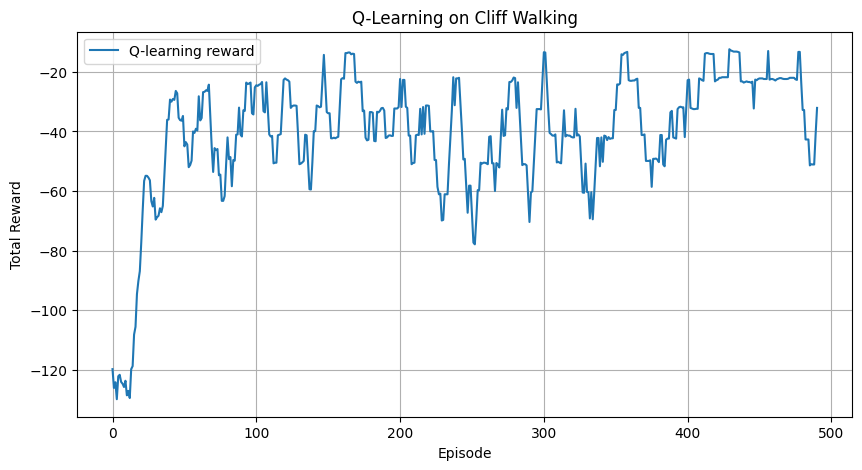

In [ ]:
env = CliffWalkingEnv()
Q, rewards = q_learning(env, episodes=500)

# Smooth plot
def smooth(x, window=10):
    return np.convolve(x, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10, 5))
plt.plot(smooth(rewards), label='Q-learning reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning on Cliff Walking')
plt.grid(True)
plt.legend()
plt.show()


* Visualization of the path followed by our Reinforcement Learning Agent

In [ ]:
def visualize_path(Q, env):
    grid = np.full((env.rows, env.cols), '.', dtype=str)
    state = env.start
    grid[env.goal] = 'G'
    grid[env.start] = 'S'

    while state != env.goal:
        action = np.argmax(Q[state])
        r, c = state

        if action == 0: r = max(r - 1, 0)       # up
        elif action == 1: r = min(r + 1, env.rows - 1)  # down
        elif action == 2: c = max(c - 1, 0)       # left
        elif action == 3: c = min(c + 1, env.cols - 1)  # right

        next_state = (r, c)
        if next_state == env.start or grid[next_state] == 'S':  # loop detection
            break

        if grid[next_state] == '.':
            grid[next_state] = '*'  # mark path
        state = next_state

    for r in range(env.rows):
        print(' '.join(grid[r]))


In [ ]:
visualize_path(Q, env)

. . . . . . . . . . . .
. . . . . . . . . . . .
* * * * * * * * * * * *
S . . . . . . . . . . G
